# Notebook для анализа и обработки данных и обучения модели XGBoost для классификации музыкальных треков по жанрам.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/spotify_songs.csv')
data

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,5qs8T6ZHSrnllnOuUk6muC,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,1kEczIkZH8IgaWT2BiApxZ,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,14HYMxFhpgDIr9cci1u0kt,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,New Jack Swing/ R&B Hits: 1987 - 2002,4sji14lrB5bgcr51lPALYH,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [3]:
data.isna().sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

Преобразуем таблицу: переименуем пару столбцов, удалим все id, переведем время в численный вид и удалим треки без слов.

In [4]:
# Переименовываем
data = data.rename(columns={'playlist_genre': 'genre', 'playlist_subgenre': 'subgenre'})

# Конвертируем время
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], format='mixed').astype(int) // 10 ** 11

# Удаляем ненужные данные
data = data.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1)
data = data[pd.notna(data.lyrics)]

In [5]:
data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,genre,subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,9783072,Pinoy Classic Rock,rock,classic rock,0.682,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,15112224,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,11045376,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,13514688,Christmas Soul,r&b,neo soul,0.425,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,15691104,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,13956192,♥ EDM LOVE 2020,edm,progressive electro house,0.479,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),14186016,10er Playlist,pop,electropop,0.963,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),13733280,Sexy Soul 2020,r&b,neo soul,0.458,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,I'll Do 4 U (Re-Recorded / Remastered),12858912,New Jack Swing/ R&B Hits: 1987 - 2002,r&b,new jack swing,0.832,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18194 entries, 0 to 18453
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                18194 non-null  object 
 1   track_artist              18194 non-null  object 
 2   lyrics                    18194 non-null  object 
 3   track_popularity          18194 non-null  int64  
 4   track_album_name          18194 non-null  object 
 5   track_album_release_date  18194 non-null  int64  
 6   playlist_name             18194 non-null  object 
 7   genre                     18194 non-null  object 
 8   subgenre                  18194 non-null  object 
 9   danceability              18194 non-null  float64
 10  energy                    18194 non-null  float64
 11  key                       18194 non-null  int64  
 12  loudness                  18194 non-null  float64
 13  mode                      18194 non-null  int64  
 14  speechiness

In [7]:
data.describe(include='object')

,track_name,track_artist,lyrics,track_album_name,playlist_name,genre,subgenre,language
count,18194,18194,18194,18194,18194,18194,18194,18194
unique,14975,5946,15977,12497,441,6,24,34
top,Poison,Queen,Lyrics for this song have yet to be released. ...,Greatest Hits,Indie Poptimism,pop,indie poptimism,en
freq,12,123,48,108,256,3957,1270,15405


In [8]:
data.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18194.000000,1.819400e+04,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000
mean,42.504562,1.246072e+07,0.644209,0.692715,5.340827,-6.752138,0.582280,0.106312,0.174424,0.043411,0.189347,0.522838,120.809299,230591.541882
std,24.663300,3.901208e+06,0.150130,0.179366,3.614767,2.894560,0.493197,0.102416,0.215997,0.150668,0.153377,0.227645,27.635937,56780.265327
min,0.000000,-4.102272e+06,0.116000,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,1.089677e+07,0.546000,0.574000,2.000000,-8.220000,0.000000,0.039600,0.016300,0.000000,0.092700,0.347000,98.579750,193609.250000
50%,48.000000,1.419336e+07,0.660000,0.715000,6.000000,-6.221500,1.000000,0.060200,0.082300,0.000007,0.128000,0.524000,120.028500,221498.000000
75%,62.000000,1.531440e+07,0.756000,0.834000,9.000000,-4.717000,1.000000,0.131000,0.252000,0.001370,0.246000,0.702000,136.017750,258090.250000
max,100.000000,1.579219e+07,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


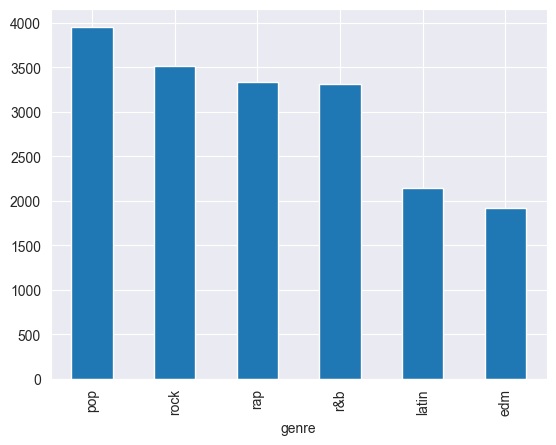

In [9]:
data.genre.value_counts().plot(kind='bar');

Классы не очень хорошо сбалансированы, поэтому будем в дальнейшем максимизировать `f1_score` с `average = macro`

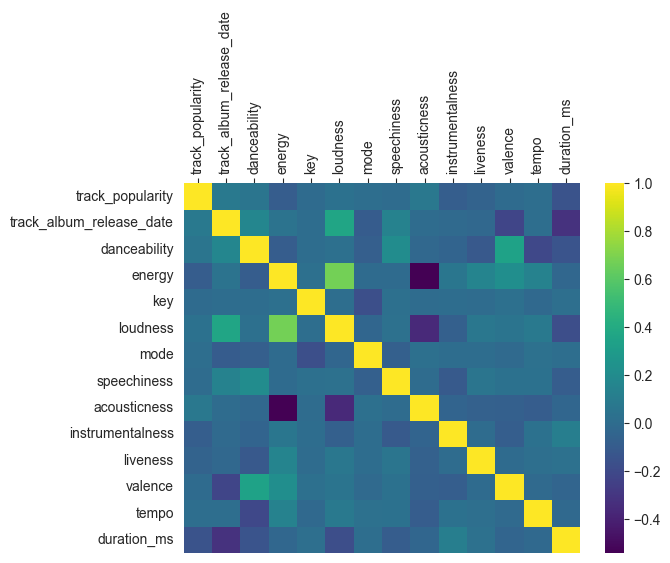

In [10]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()

graphic = sns.heatmap(data=corr_matrix, cmap='viridis')
graphic.xaxis.set_ticks_position('top')
graphic.xaxis.set_tick_params(rotation=90)

Признаки `energy` и `loudness` имеют корреляцию свыше 0.6, поэтому один из признаков можем убрать

In [11]:
data = data.drop(['energy'], axis=1)
data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,genre,subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,9783072,Pinoy Classic Rock,rock,classic rock,0.682,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,15112224,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,11045376,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,13514688,Christmas Soul,r&b,neo soul,0.425,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,15691104,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,13956192,♥ EDM LOVE 2020,edm,progressive electro house,0.479,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),14186016,10er Playlist,pop,electropop,0.963,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),13733280,Sexy Soul 2020,r&b,neo soul,0.458,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,I'll Do 4 U (Re-Recorded / Remastered),12858912,New Jack Swing/ R&B Hits: 1987 - 2002,r&b,new jack swing,0.832,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


Устанавливаем библиотеку `nltk`. Нам нужна токенизация, чтобы изменить текст и добавить новые признаки к данным.

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\79773\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Соединим `track_name + track_artist + track_album_name + playlist_name + lyrics` в новый признак `text`, а затем удалим их 

In [14]:
data['text'] = data.track_name + data.track_artist + data.track_album_name + data.playlist_name + data.lyrics
data = data.drop(['track_name', 'track_artist', 'track_album_name', 'playlist_name', 'lyrics'], axis=1)

In [15]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+'{0,1}.{0,1}\.{0,1}")
data['text'] = data.text.apply(tokenizer.tokenize).apply(' '.join)

In [16]:
data

,track_popularity,track_album_release_date,genre,subgenre,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,text
0,41,9783072,rock,classic rock,0.682,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl,PangarapBarbie's CradleTripPinoy Classic RockM...
1,28,15112224,rock,hard rock,0.303,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en,I Feel AliveSteady RollinLove LossHard Rock Wo...
2,0,11045376,r&b,new jack swing,0.845,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en,PoisonBell Biv DeVoeGoldBack in the day R B Ne...
3,41,13514688,r&b,neo soul,0.425,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en,Baby It's Cold Outside feat. Christina Aguiler...
4,65,15691104,pop,dance pop,0.760,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en,Dumb LittyKARDKARD 2nd Digital Single Dumb Lit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0,13956192,edm,progressive electro house,0.479,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en,Rising Like The Sun Radio MixQulinezRising Lik...
18450,49,14186016,pop,electropop,0.963,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en,AnacondaNicki MinajThe Pinkprint Deluxe Editio...
18451,40,13733280,r&b,neo soul,0.458,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en,BoundPonderosa Twins Plus One2 2 1 Digitally R...
18452,36,12858912,r&b,new jack swing,0.832,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en,I' ll Do 4 U Re Recorded Remastered Father MCI...


Используем библиотеку `googletrans` для перевода всех текстов на английский, с которым будем работать в дальнейшем

In [55]:
from googletrans import Translator

def translate(text, iter_num=None, words_num=625):
    if iter_num:
        sys.stdout.write(f'Переведено текстов: {iter_num} | 2789\r')
    
    if text:
        try:
            words = text.split()
            # googletrans не способен работать с большими текстами, поэтому обрезаем их и переводим
            split_words = [' '.join(words[i * words_num: min(len(words), (i + 1) * words_num)]) for i in range(len(words) // words_num + 1)]
            translator = Translator()
            for i in range(len(split_words)):
                split_words[i] = translator.translate(split_words[i]).text
            
            return ' '.join(split_words) 
        except Exception as _:
            translate(text, iter_num=iter_num, words_num=words_num - 100)
    else:
        return ''

In [58]:
texts = data[data.language != 'en'].text
data.loc[data.language != 'en', 'text'] = [translate(texts.iloc[i], iter_num=i + 1) for i in range(len(texts))]

In [59]:
data = data.drop(['language'], axis=1)

# Появилось 3 пустых текста, удалим их
data = data[data.text.notna()]

Используем токены и `tf-idf` векторизацию для создания новых признаков

In [75]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = RegexpTokenizer(r"\w+'{0,1}.{0,1}")

data['text_length'] = data.text.apply(len)  # Кол-во символов
data['words_count'] = data.text.apply(tokenizer.tokenize).apply(len)  # Кол-во слов
data['unique_words_count'] = data.text.apply(tokenizer.tokenize).apply(set).apply(len)  # Кол-во уникальных слов
data['mean_word_length'] = np.array([np.mean([len(word) for word in words]) for words in data.text.apply(tokenizer.tokenize)])  # Средняя длина слов

def sentence_similarity(text):
    sentences = sent_tokenize(text)

    text_transformer = TfidfVectorizer()
    tfidf_matrix = text_transformer.fit_transform(sentences)
    similarity_matrix = cosine_similarity(tfidf_matrix)

    return similarity_matrix.mean()

data['sentence_similarity'] = data.text.apply(sentence_similarity)

И последний штрих предобработки датафрема - удалим признак `subgenre`. Интуитивно понятно, что жанр песни сильно зависит от этого признака, поэтому усложним задачу

In [77]:
data = data.drop(['subgenre'], axis=1)

In [79]:
data

,track_popularity,track_album_release_date,genre,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,text,text_length,words_count,unique_words_count,mean_word_length,sentence_similarity
0,41,9783072,rock,0.682,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,DreamBarbie's cradletrippinoy classic rockmins...,634,126,70,5.000000,1.000000
1,28,15112224,rock,0.303,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,I Feel AliveSteady RollinLove LossHard Rock Wo...,567,117,74,4.846154,1.000000
2,0,11045376,r&b,0.845,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,PoisonBell Biv DeVoeGoldBack in the day R B Ne...,2234,462,234,4.783550,0.185819
3,41,13514688,r&b,0.425,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,Baby It's Cold Outside feat. Christina Aguiler...,1823,370,207,4.883784,0.610477
4,65,15691104,pop,0.760,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,Dumb LittyKARDKARD 2nd Digital Single Dumb Lit...,1538,365,174,4.210959,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0,13956192,edm,0.479,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,Rising Like The Sun Radio MixQulinezRising Lik...,1395,278,92,5.017986,1.000000
18450,49,14186016,pop,0.963,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,AnacondaNicki MinajThe Pinkprint Deluxe Editio...,3144,686,213,4.575802,0.706155
18451,40,13733280,r&b,0.458,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,BoundPonderosa Twins Plus One2 2 1 Digitally R...,738,144,70,5.118056,1.000000
18452,36,12858912,r&b,0.832,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,I' ll Do 4 U Re Recorded Remastered Father MCI...,2854,681,231,4.162996,0.643284


In [112]:
data

,track_popularity,track_album_release_date,genre,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,text,text_length,words_count,unique_words_count,mean_word_length,sentence_similarity
0,41,9783072,rock,0.682,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,DreamBarbie's cradletrippinoy classic rockmins...,634,126,70,5.000000,1.000000
1,28,15112224,rock,0.303,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,I Feel AliveSteady RollinLove LossHard Rock Wo...,567,117,74,4.846154,1.000000
2,0,11045376,r&b,0.845,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,PoisonBell Biv DeVoeGoldBack in the day R B Ne...,2234,462,234,4.783550,0.185819
3,41,13514688,r&b,0.425,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,Baby It's Cold Outside feat. Christina Aguiler...,1823,370,207,4.883784,0.610477
4,65,15691104,pop,0.760,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,Dumb LittyKARDKARD 2nd Digital Single Dumb Lit...,1538,365,174,4.210959,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0,13956192,edm,0.479,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,Rising Like The Sun Radio MixQulinezRising Lik...,1395,278,92,5.017986,1.000000
18450,49,14186016,pop,0.963,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,AnacondaNicki MinajThe Pinkprint Deluxe Editio...,3144,686,213,4.575802,0.706155
18451,40,13733280,r&b,0.458,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,BoundPonderosa Twins Plus One2 2 1 Digitally R...,738,144,70,5.118056,1.000000
18452,36,12858912,r&b,0.832,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,I' ll Do 4 U Re Recorded Remastered Father MCI...,2854,681,231,4.162996,0.643284


Разделим данные на объекты и таргеты, а также на обучающие и тестовые, предварительно закодируя таргеты `LabelEncoder'ом`

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop(['genre'], axis=1)
y = LabelEncoder().fit_transform(data.genre)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

Напишем два трансформера, которые выполняют следующие действия: 

1. Категориальные строковые признаки преобразует при помощи `OneHotEncoder`;
2. Стандартизирует численные данные при помощи `StandardScaler`;
3. Используя `TfidfVectorizer`, текста заменяет на векторы;
4. Для преобразованных данных `KMeans` предсказывает для них кластер и добавляет в данные.

In [100]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans


class DataTransformer(TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.text_transformer = TfidfVectorizer()

    def fit(self, X_):
        self.scaler.fit(X_.select_dtypes(include=[np.number]))
        self.text_transformer.fit(X_.text) 
        
        return self
    
    def transform(self, X_):
        standardize_data = self.scaler.transform(X_.select_dtypes(include=[np.number]))
        vectorized_text = self.text_transformer.transform(X_.text)
        
        return hstack([standardize_data, vectorized_text])
    

class ClusterizeTransform(TransformerMixin):
    def __init__(self):
        self.clusterize = KMeans(n_clusters=6)
        self.encoder = OneHotEncoder()
        
    def fit(self, X_):
        self.clusterize.fit(X_)
        self.encoder.fit(self.clusterize.predict(X_).reshape(-1, 1))
        
        return self
    
    def transform(self, X_):
        clusters = self.encoder.transform(self.clusterize.predict(X_).reshape(-1, 1))

        return hstack([X_, clusters])

In [101]:
transformer = DataTransformer()
clusterize = ClusterizeTransform()

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

X_train = clusterize.fit_transform(X_train)
X_test = clusterize.transform(X_test)

В качестве baseline модели обучим `RandomForestClassifier` без подбора гиперпараметров.

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

baseline_model = RandomForestClassifier()
baseline_model.fit(X_train, y_train)

print(classification_report(y_test, baseline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59       384
           1       0.69      0.51      0.59       430
           2       0.54      0.76      0.63       792
           3       0.78      0.51      0.61       663
           4       0.73      0.75      0.74       667
           5       0.74      0.84      0.79       703

    accuracy                           0.67      3639
   macro avg       0.69      0.65      0.66      3639
weighted avg       0.69      0.67      0.67      3639



Наконец, можно подойти к поиску оптимальной модели `BayesSearchCV + XGBClassifier`.

In [115]:
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real

f1_scorer = make_scorer(f1_score, average='macro')

param_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(5, 10),
    'learning_rate': Real(0.01, 0.4),
    'gamma': Real(0, 10),
    'subsample': Real(0.1, 1),
    'min_child_weight': Real(0, 1),
    'reg_lambda': Real(0, 10)
}

searcher = BayesSearchCV(XGBClassifier(objective='multi:softmax'), param_space, n_iter=20, scoring=f1_scorer, cv=5, verbose=100)
searcher.fit(X_train, y_train)

model = searcher.best_estimator_

print(f'Лучший показатель f1-score: {searcher.best_score_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START gamma=4.0175972537081615, learning_rate=0.38843594975118545, max_depth=8, min_child_weight=0.01964452630078706, n_estimators=191, reg_lambda=9.374931166502849, subsample=0.7193024359140717
[CV 1/5; 1/1] END gamma=4.0175972537081615, learning_rate=0.38843594975118545, max_depth=8, min_child_weight=0.01964452630078706, n_estimators=191, reg_lambda=9.374931166502849, subsample=0.7193024359140717;, score=0.825 total time= 1.6min
[CV 2/5; 1/1] START gamma=4.0175972537081615, learning_rate=0.38843594975118545, max_depth=8, min_child_weight=0.01964452630078706, n_estimators=191, reg_lambda=9.374931166502849, subsample=0.7193024359140717
[CV 2/5; 1/1] END gamma=4.0175972537081615, learning_rate=0.38843594975118545, max_depth=8, min_child_weight=0.01964452630078706, n_estimators=191, reg_lambda=9.374931166502849, subsample=0.7193024359140717;, score=0.839 total time= 1.4min
[CV 3/5; 1/1] START gamma=4.017597253708161

In [152]:
# Подобранные гиперпараметры
dict(searcher.best_params_)

{'gamma': 0.0,
 'learning_rate': 0.23658066953127774,
 'max_depth': 5,
 'min_child_weight': 1.0,
 'n_estimators': 200,
 'reg_lambda': 0.4106244749708288,
 'subsample': 0.8744550845747905}

Модель показывает показатель `CVscore` около 0.86, что сильно лучше, чем показатели baseline модели. Посмотрим теперь на другие метрики

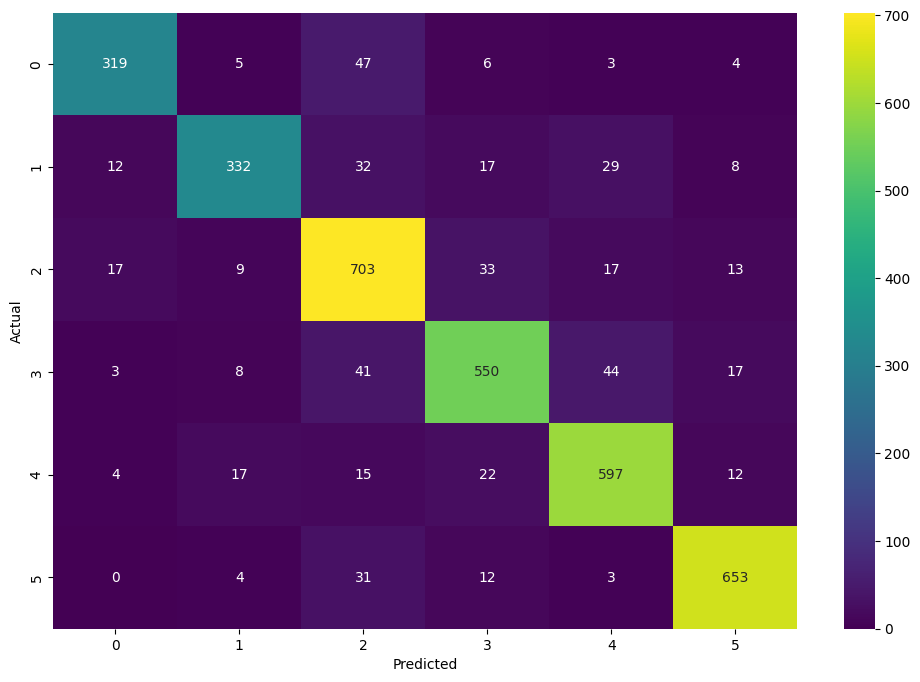

In [216]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       384
           1       0.89      0.77      0.82       430
           2       0.81      0.89      0.85       792
           3       0.86      0.83      0.84       663
           4       0.86      0.90      0.88       667
           5       0.92      0.93      0.93       703

    accuracy                           0.87      3639
   macro avg       0.87      0.86      0.86      3639
weighted avg       0.87      0.87      0.87      3639



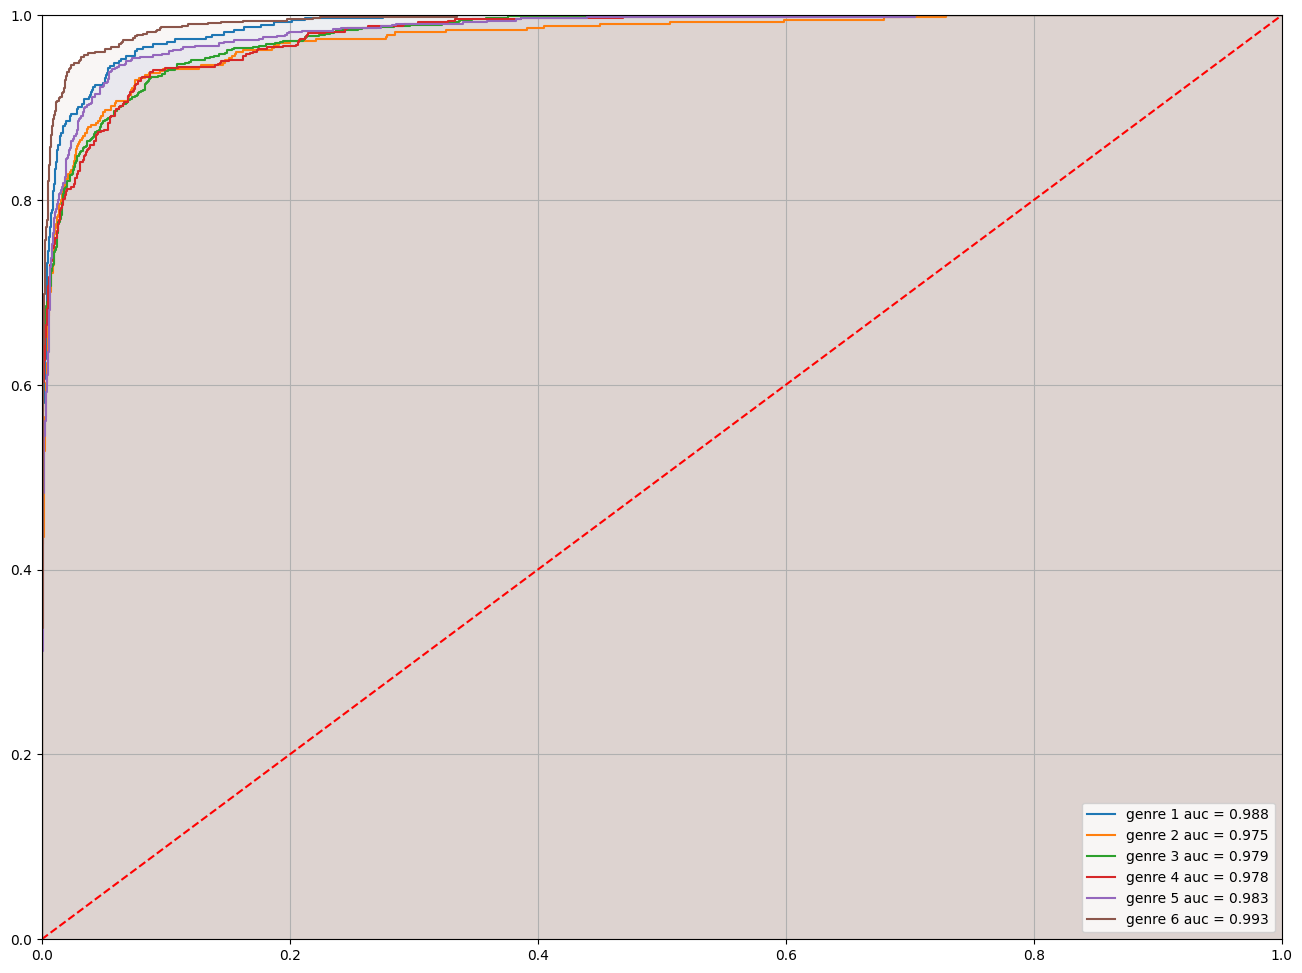

In [223]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(16, 12))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

y_bin = label_binarize(y_test, classes=model.classes_)
y_proba = model.predict_proba(X_test)
for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'genre {i + 1} auc = {roc_auc_score(y_bin[:, i], y_proba[:, i]):.3f}')
    plt.fill_between(fpr, tpr, np.zeros_like(tpr), alpha=0.05)

plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.legend(loc='lower right');

In [226]:
print(f"Показатель ROC-AUC с macro-усреднением: {roc_auc_score(y_bin, y_proba, average='macro')}")

Показатель ROC-AUC с macro-усреднением: 0.9828171040198467


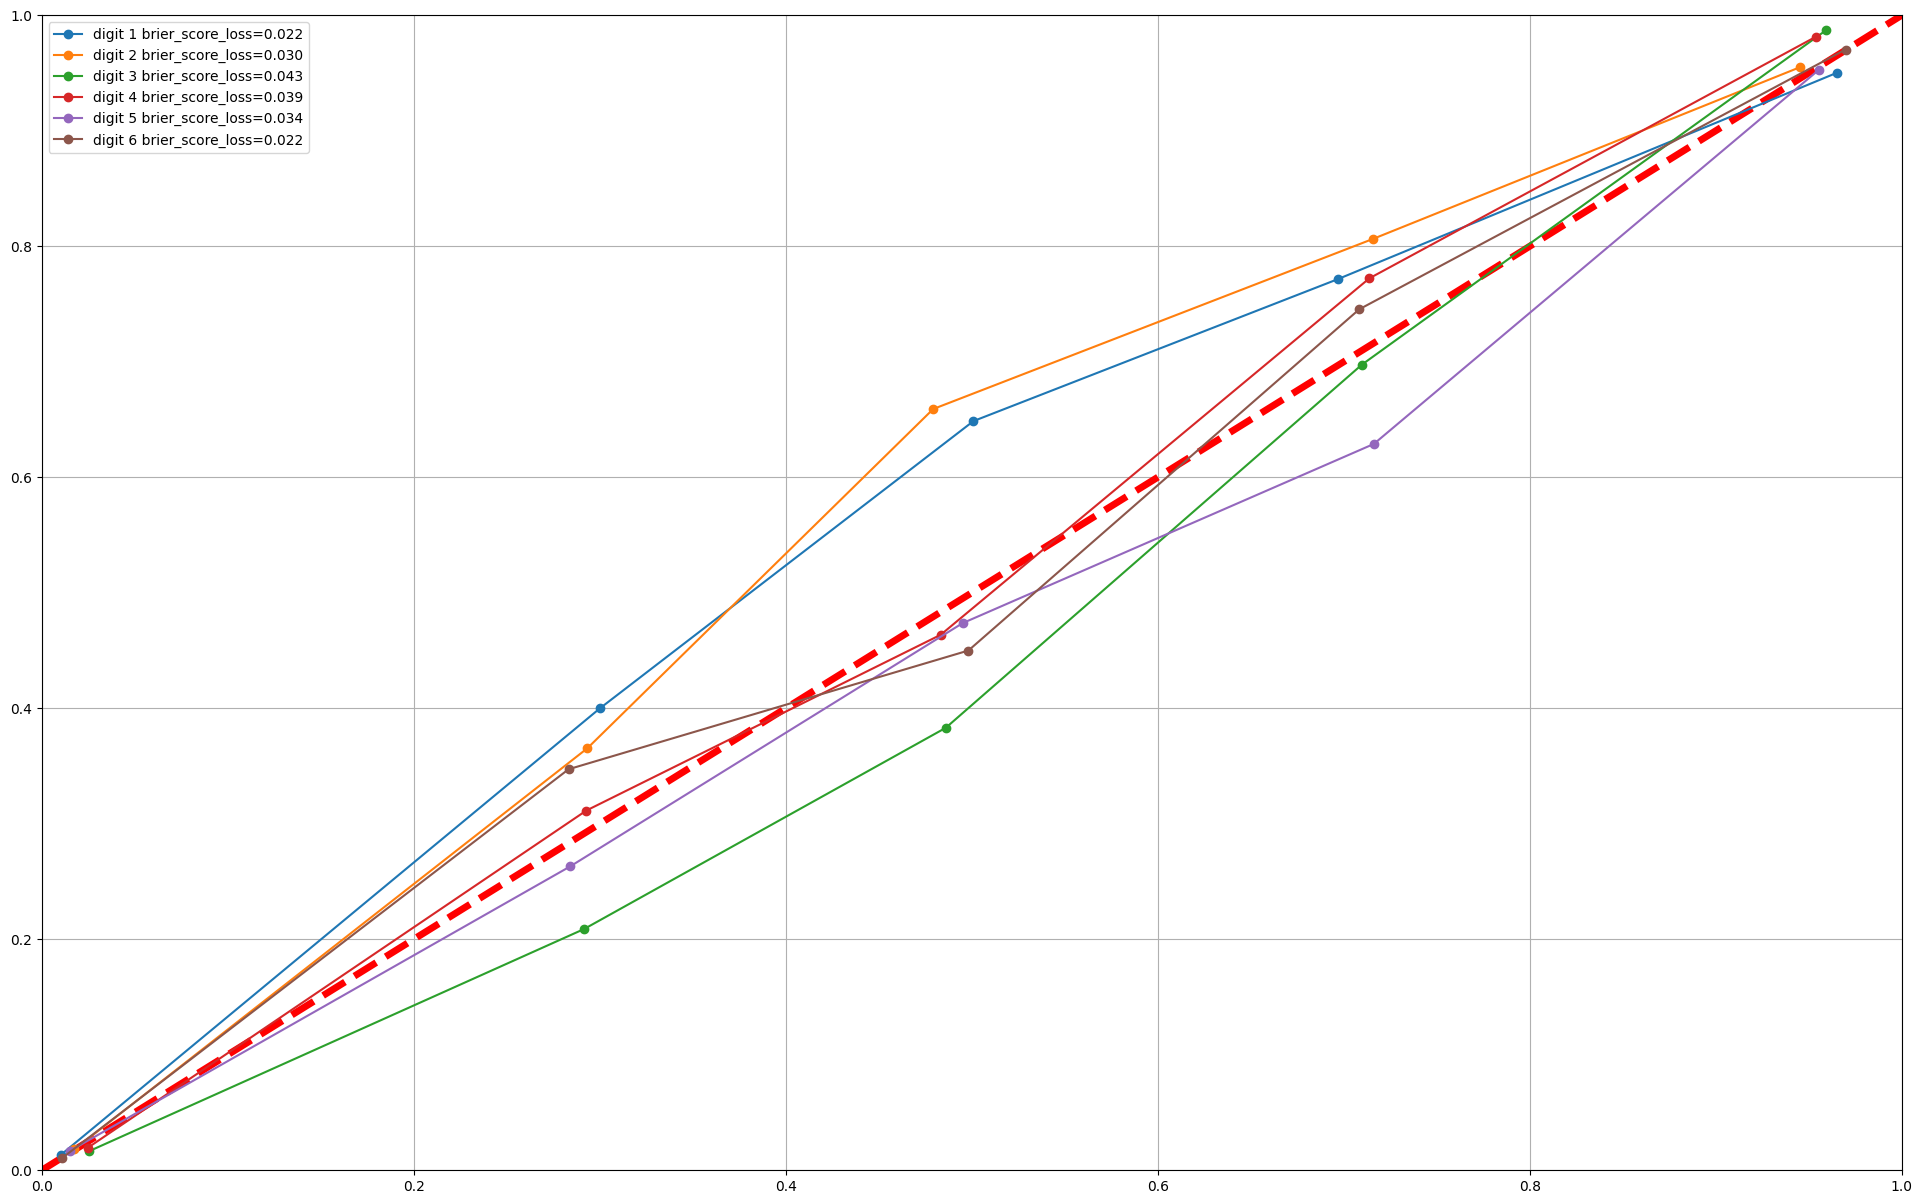

In [219]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

plt.figure(figsize=(24, 15))
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=5, color='red')

for i in range(6):
    true_prob, pred_prob = calibration_curve(y_bin[:, i], y_proba[:, i], n_bins=5)
    plt.plot(pred_prob, true_prob, marker='o', label=f'digit {i + 1} brier_score_loss={brier_score_loss(y_bin[:, i], y_proba[:, i]):.3f}')

plt.grid(True)
plt.axis((0, 1, 0, 1))
plt.legend(loc='upper left');

Показатель `ROC-AUC` достаточно высокий и по графику выше видно, что модель хорошо откалибрована. Модель готова